#Original data: 

https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp?select=suicide+homicide+gdp.csv

https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv

https://www.kaggle.com/datasets/mathurinache/world-happiness-report


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# loading data
df = pd.read_csv('suicide homicide gdp clean.csv')

In [3]:
df.head()

,country,year,Homicides_per_100K,Suicides_per_100K,GDP_per_capita,GDPPC_avg,Region,incomeLevel
0,Afghanistan,2009,3.92677,4.4,1519.69,1818.825684,Asia & Pacific,Low income
1,Afghanistan,2010,3.36811,4.3,1710.58,1818.825684,Asia & Pacific,Low income
2,Afghanistan,2011,4.08734,4.1,1699.49,1818.825684,Asia & Pacific,Low income
3,Afghanistan,2012,6.25133,4.0,1914.77,1818.825684,Asia & Pacific,Low income
4,Afghanistan,2015,9.78392,4.0,2087.31,1818.825684,Asia & Pacific,Low income


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             3695 non-null   object 
 1   year                3695 non-null   int64  
 2   Homicides_per_100K  3695 non-null   float64
 3   Suicides_per_100K   3695 non-null   float64
 4   GDP_per_capita      3695 non-null   float64
 5   GDPPC_avg           3695 non-null   float64
 6   Region              3695 non-null   object 
 7   incomeLevel         3695 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 231.1+ KB


In [5]:
df.describe()

,year,Homicides_per_100K,Suicides_per_100K,GDP_per_capita,GDPPC_avg
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,2008.022463,9.340511,11.160758,16266.289979,16266.290313
std,4.694141,12.142849,8.715888,16337.311024,15793.250792
min,2000.000000,0.168786,0.200000,532.550000,719.196194
25%,2004.000000,1.528985,5.100000,5327.430000,5703.400604
50%,2008.000000,4.395550,8.900000,10785.100000,11272.735514
75%,2012.000000,10.953500,14.400000,23735.800000,21462.147806
max,2016.000000,105.231000,92.400000,141635.000000,122389.945913


In [6]:
# defining bins and category names
bins = [719, 8600, 25417, 35015, 48000, 122389.95]
gname = ['Low', 'Mid-Low', 'Mid-High', 'High', 'Very High']
# add categories to column
df['incomeLevel'] = pd.cut(df.GDPPC_avg, bins, labels = gname)

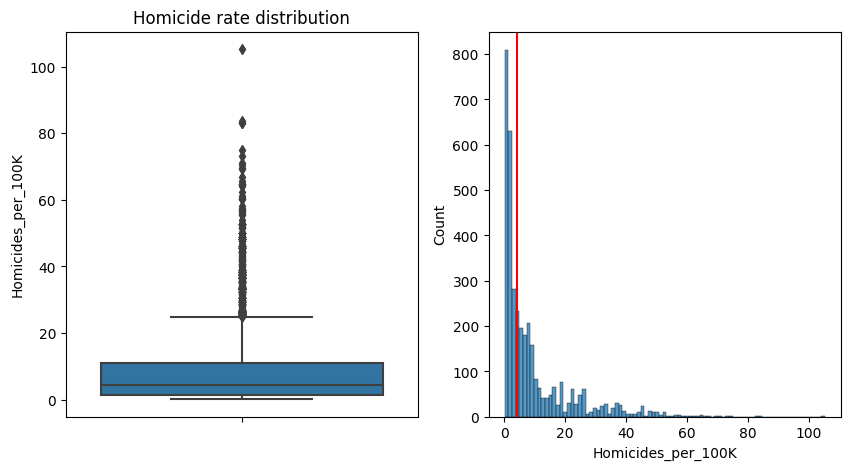

In [7]:
# plotting homicide data
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Homicide rate distribution')
sns.boxplot(data=df, y='Homicides_per_100K', ax=axes[0])
sns.histplot(data=df, x='Homicides_per_100K', ax=axes[1])
plt.axvline(np.median(df['Homicides_per_100K']), color = 'r')
plt.show()


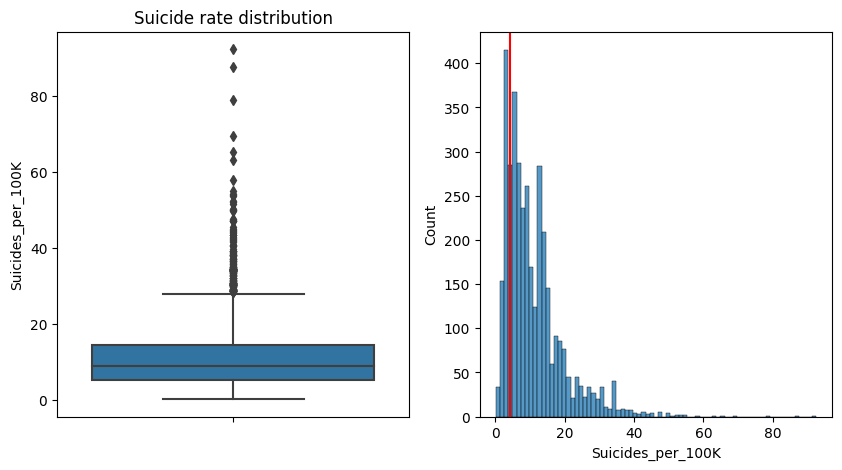

In [8]:
# plotting suicide data

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].set_title('Suicide rate distribution')
sns.boxplot(data=df, y='Suicides_per_100K', ax=axes[0])
sns.histplot(data=df, x='Suicides_per_100K', ax=axes[1])
plt.axvline(np.median(df['Homicides_per_100K']), color = 'r')
plt.show()


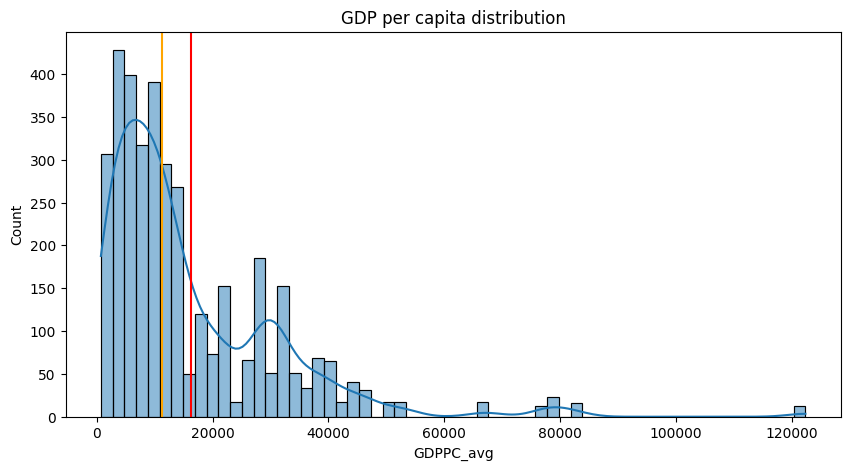

In [9]:
# Checking GDP distribution
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'GDPPC_avg', kde = True).set(title='GDP per capita distribution')
plt.axvline(np.mean(df.GDPPC_avg), color = 'r')
plt.axvline(np.median(df.GDPPC_avg), color = 'orange')
plt.show()

# 
GDP distribution is left-skewed. There are outliers starting from 50000 USD per capita.  
We need to check these countries in different graph.

In [10]:
df.country[df.GDPPC_avg >= 50000].unique()

array(['Brunei Darussalam', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar',
       'Singapore', 'Switzerland', 'United Arab Emirates'], dtype=object)

In [11]:
# creating DataFrame for outliers
outl = df[df.GDPPC_avg >= 50000]

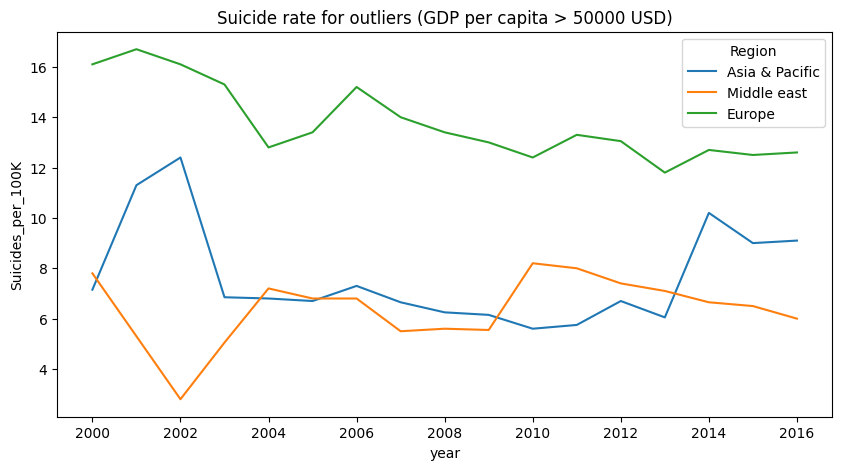

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data = outl, x = 'year', y = 'Suicides_per_100K', hue = 'Region', errorbar=None, estimator = 'median').set(title='Suicide rate for outliers (GDP per capita > 50000 USD)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.show()

# 
European countries among outliers having highest level of suicides, while in Asia the peak there is a peak in 2014.
In Middle East the level is lowest among the group and have tend to decrease starting from 2010.

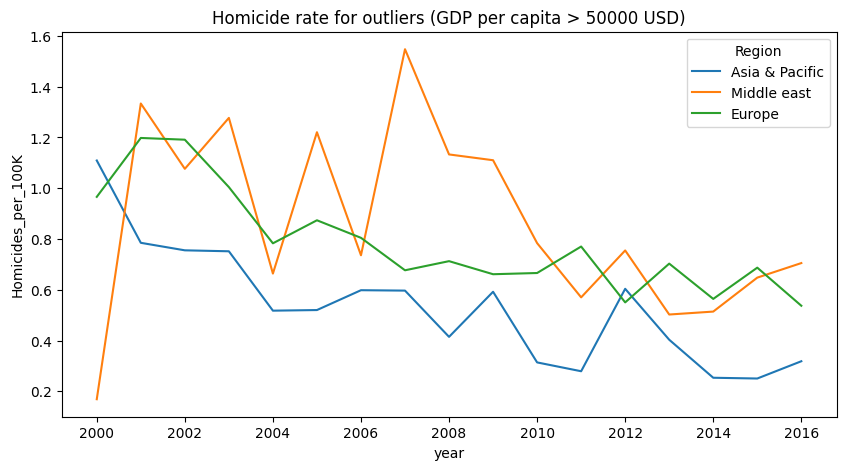

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data = outl, x = 'year', y = 'Homicides_per_100K', hue = 'Region', errorbar=None, estimator = 'median').set(title='Homicide rate for outliers (GDP per capita > 50000 USD)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.show()

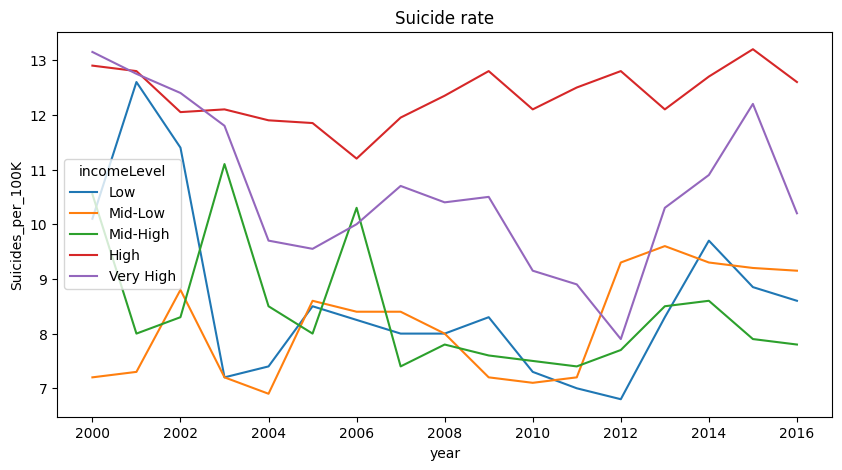

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'year', y = 'Suicides_per_100K', hue = 'incomeLevel', errorbar=None, estimator='median').set(title='Suicide rate')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.show()

# 
Countries with high GDP per capita level have gradual increase of suicides starting from 2006.  
For countries with low and very high level pattern over time seems to be almost identical with minimum level in 2012.

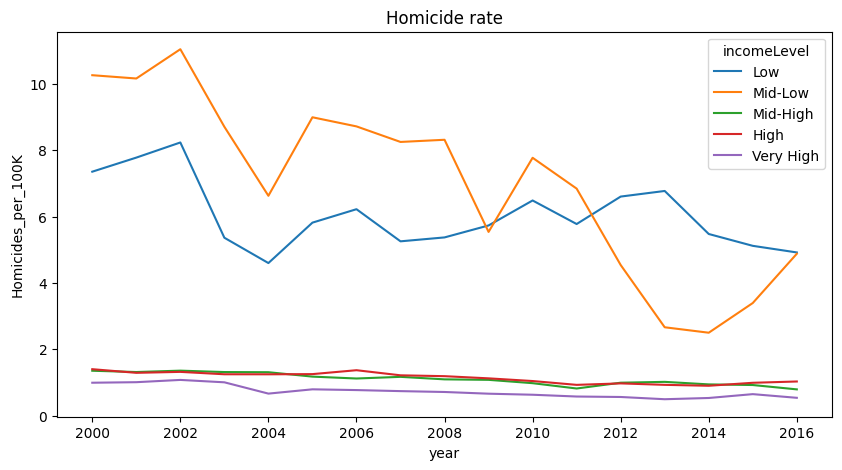

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'year', y = 'Homicides_per_100K', hue = 'incomeLevel', errorbar=None, estimator='median').set(title='Homicide rate')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.show()

# 
For countries having GDP per capita starting from Mid-high, Homicide rate is very low and stable.  

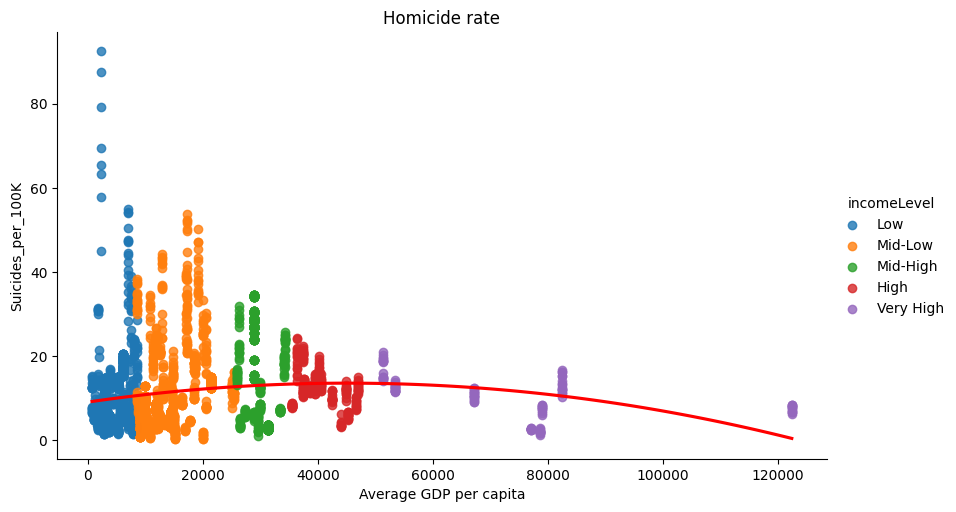

In [16]:
# Cheking the distribution among the gpd rate per capita
sns.lmplot(data = df, x = 'GDPPC_avg', y = 'Suicides_per_100K', order = 2, ci = None, height=5, aspect=1.7, hue = 'incomeLevel', fit_reg=False).set(title='Homicide rate')
sns.regplot(data = df, x = 'GDPPC_avg', y = 'Suicides_per_100K', order = 2, ci = None, scatter=False, color='r')

plt.xlabel('Average GDP per capita')
plt.show()

In [17]:
spearmanr(df.GDPPC_avg, df.Suicides_per_100K)

SignificanceResult(statistic=0.1412799545341059, pvalue=6.225989223294691e-18)

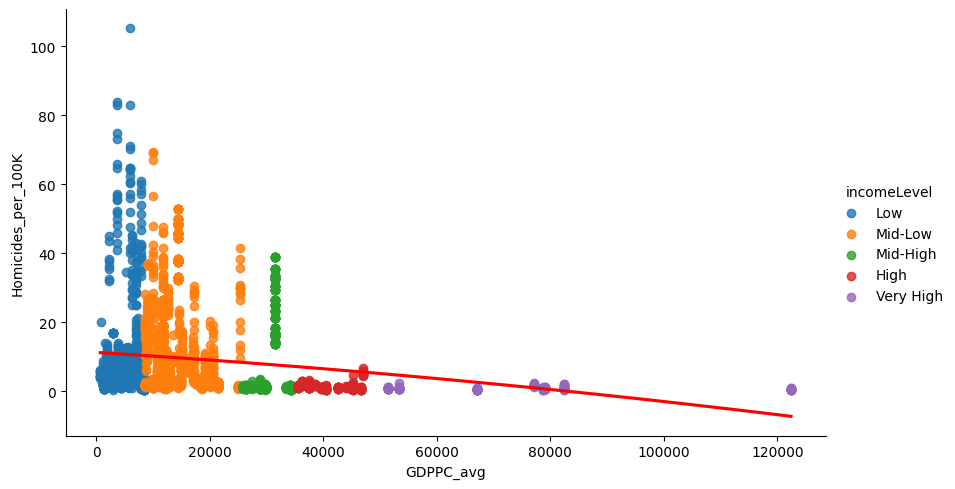

In [18]:
# Cheking the distribution among the gpd rate per capita
sns.lmplot(data = df, x = 'GDPPC_avg', y = 'Homicides_per_100K', order = 2, ci = None, height=5, aspect=1.7, hue = 'incomeLevel', fit_reg=False)
sns.regplot(data = df, x = 'GDPPC_avg', y = 'Homicides_per_100K', order = 2, ci = None, scatter=False, color='r')
plt.show()

In [19]:
spearmanr(df.GDPPC_avg, df.Homicides_per_100K)

SignificanceResult(statistic=-0.329921413205267, pvalue=1.5300357244985754e-94)

In [20]:
gh = pd.read_csv('Gini_Happ.csv')

In [21]:
gh.head()

,Country Name,Year,GINI,Happ_index
0,Albania,2015,32.8,4.959
1,Albania,2016,33.7,4.655
2,Albania,2017,33.1,4.644
3,Albania,2018,30.1,4.586
4,Angola,2018,51.3,3.795


In [22]:
df2 = pd.merge(
    df,
    gh,
    how = 'inner',
    left_on=['country','year'],
    right_on=['Country Name','Year'])

In [23]:
df2

,country,year,Homicides_per_100K,Suicides_per_100K,GDP_per_capita,GDPPC_avg,Region,incomeLevel,Country Name,Year,GINI,Happ_index
0,Albania,2015,2.21413,4.8,11658.90,7996.285731,Europe,Low,Albania,2015,32.8,4.959
1,Albania,2016,2.73695,4.7,12078.80,7996.285731,Europe,Low,Albania,2016,33.7,4.655
2,Argentina,2016,6.03331,8.3,20307.90,16287.665222,South/Latin America,Mid-Low,Argentina,2016,42.0,6.650
3,Armenia,2015,2.56361,6.2,9969.67,6951.290398,Europe,Low,Armenia,2015,32.4,4.350
4,Armenia,2016,2.96307,5.7,10704.20,6951.290398,Europe,Low,Armenia,2016,32.5,4.360
...,...,...,...,...,...,...,...,...,...,...,...,...
134,United States,2015,4.94985,14.4,56863.40,47033.295496,North America,High,United States,2015,41.2,7.119
135,United States,2016,5.39075,15.1,58021.40,47033.295496,North America,High,United States,2016,41.1,7.104
136,Uruguay,2015,8.58731,18.6,20217.60,14855.923886,South/Latin America,Mid-Low,Uruguay,2015,40.1,6.485
137,Uruguay,2016,7.82679,21.1,22454.40,14855.923886,South/Latin America,Mid-Low,Uruguay,2016,39.7,6.545


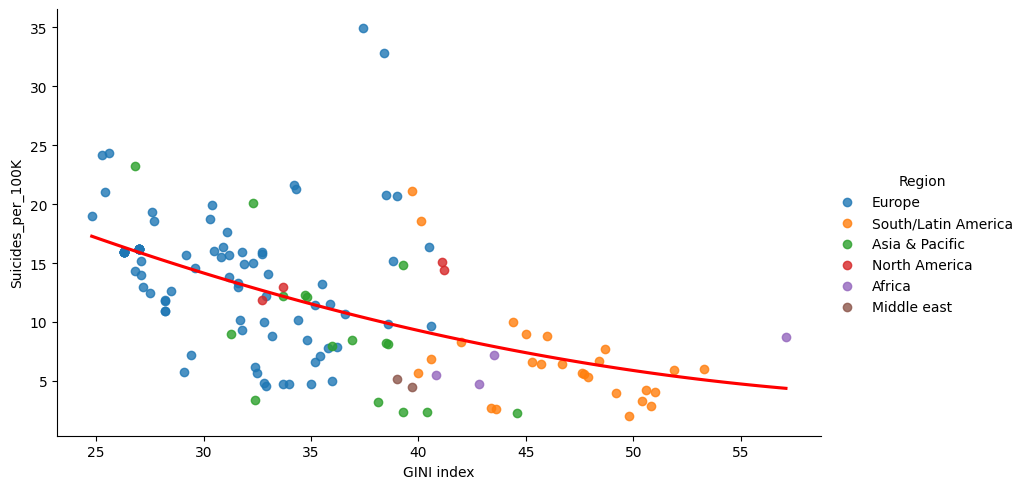

In [24]:
sns.lmplot(data = df2, x = 'GINI', y = 'Suicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, fit_reg=False)
sns.regplot(data = df2, x = 'GINI', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')
plt.show()

In [25]:
spearmanr(df2.GINI, df2.Suicides_per_100K)

SignificanceResult(statistic=-0.6297257754307479, pvalue=1.0062526600285626e-16)

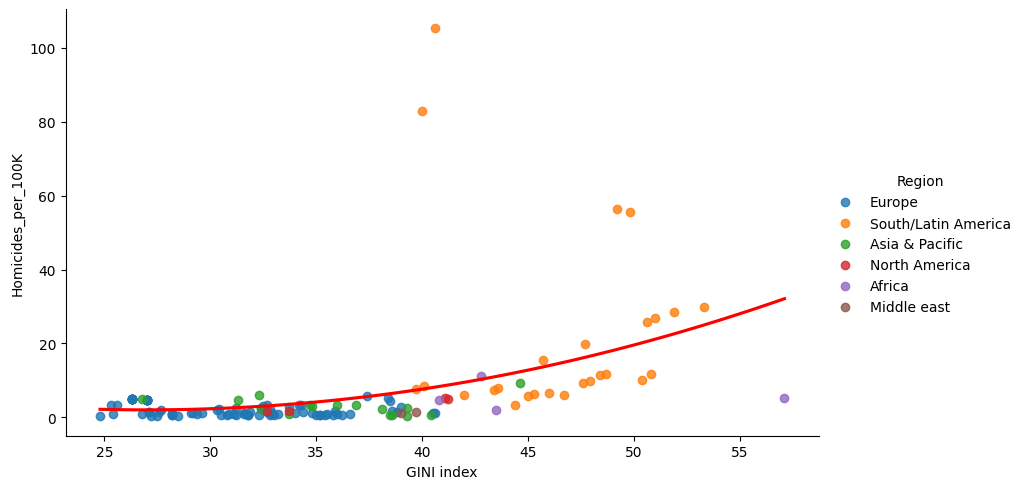

In [26]:
# Cheking the distribution among the gpd rate per capita
sns.lmplot(data = df2, x = 'GINI', y = 'Homicides_per_100K', order = 1, ci = None, hue = 'Region', height=5, aspect=1.7, fit_reg=False)
sns.regplot(data = df2, x = 'GINI', y = 'Homicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('GINI index')
plt.show()

In [27]:
spearmanr(df2.GINI, df2.Homicides_per_100K)

SignificanceResult(statistic=0.38752844738319475, pvalue=2.4392432396143192e-06)

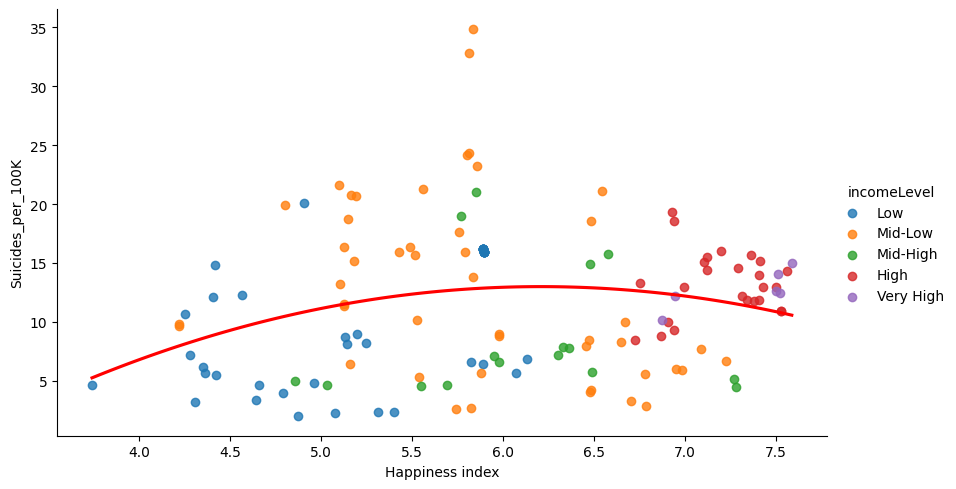

In [28]:
# Cheking the distribution among the gpd rate per capita
sns.lmplot(data = df2, x = 'Happ_index', y = 'Suicides_per_100K', order = 2, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False)
sns.regplot(data = df2, x = 'Happ_index', y = 'Suicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('Happiness index')
plt.show()

In [29]:
spearmanr(df2.Happ_index, df2.Suicides_per_100K)

SignificanceResult(statistic=0.0863535915303209, pvalue=0.3121170605836446)

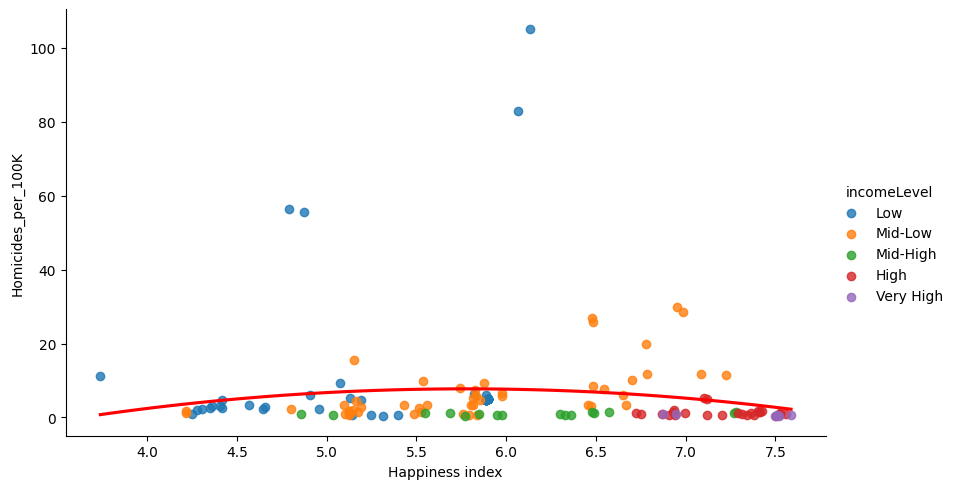

In [30]:
# Cheking the distribution among the gpd rate per capita
sns.lmplot(data = df2, x = 'Happ_index', y = 'Homicides_per_100K', order = 2, ci = None, hue = 'incomeLevel', height=5, aspect=1.7, fit_reg=False)
sns.regplot(data = df2, x = 'Happ_index', y = 'Homicides_per_100K', order = 2, ci = None, scatter = False, color = 'r')
plt.xlabel('Happiness index')
plt.xlabel('Happiness index')
plt.show()

In [31]:
spearmanr(df2.Happ_index, df2.Homicides_per_100K)

SignificanceResult(statistic=-0.1607462805021349, pvalue=0.05870861547062981)

In [32]:
# checking |outliers

In [33]:
print(df2['country'][df2.Suicides_per_100K > 30].unique())

['Lithuania']


In [34]:
print(df2['country'][df2.Homicides_per_100K > 40].unique())

['El Salvador' 'Honduras']


In [35]:
#Save to csv 
df.to_csv('suic_clean.csv', index = False)
df2.to_csv('GH.csv', index = False)